In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
df=pd.read_csv('loan_data-Copy1.csv')

In [74]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [76]:
df.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


<Axes: xlabel='fico', ylabel='Count'>

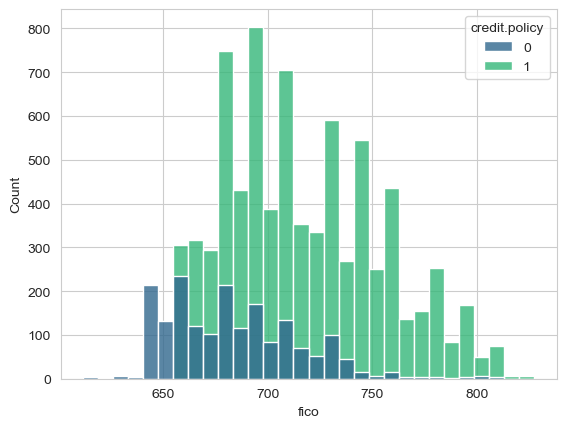

In [77]:
sns.histplot(data=df,x='fico',hue='credit.policy',bins=30,palette='viridis',alpha=0.8)

<Axes: xlabel='fico', ylabel='Count'>

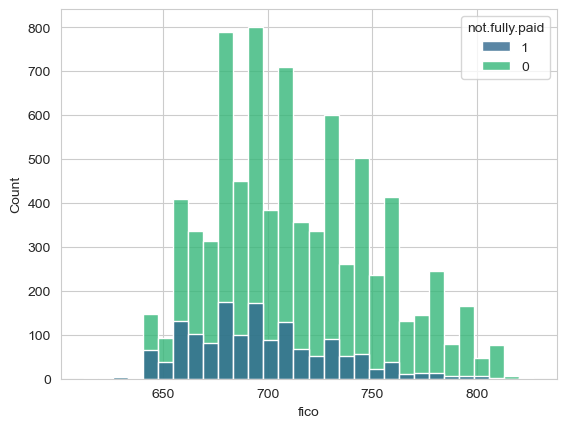

In [78]:
sns.histplot(data=df,x='fico',hue='not.fully.paid',hue_order=[1,0],palette='viridis',bins=30,alpha=0.8)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

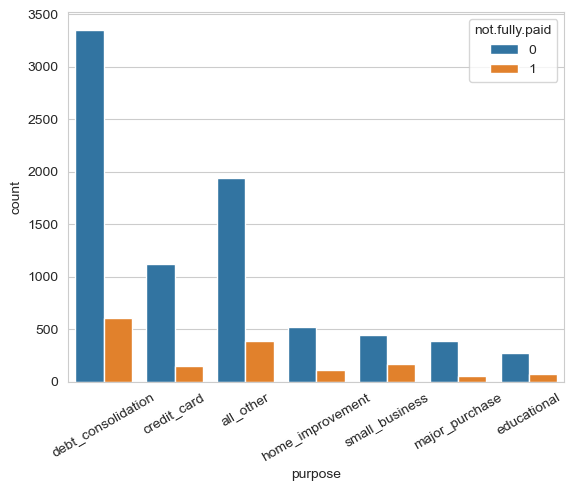

In [79]:
sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=30)

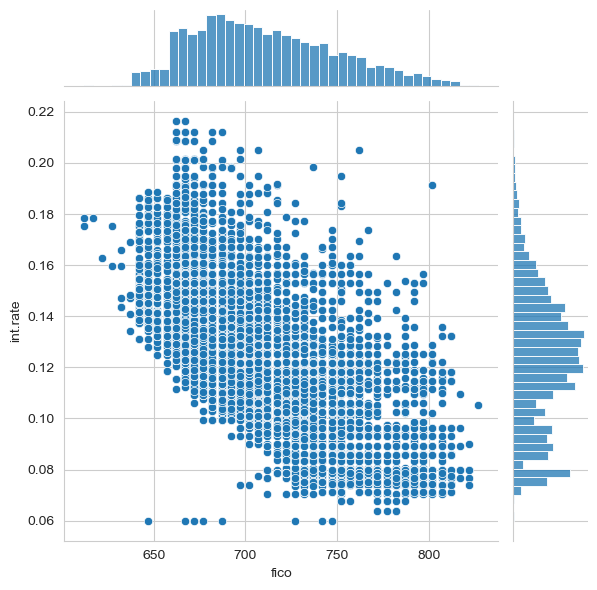

In [80]:
sns.jointplot(data=df,x='fico',y='int.rate')

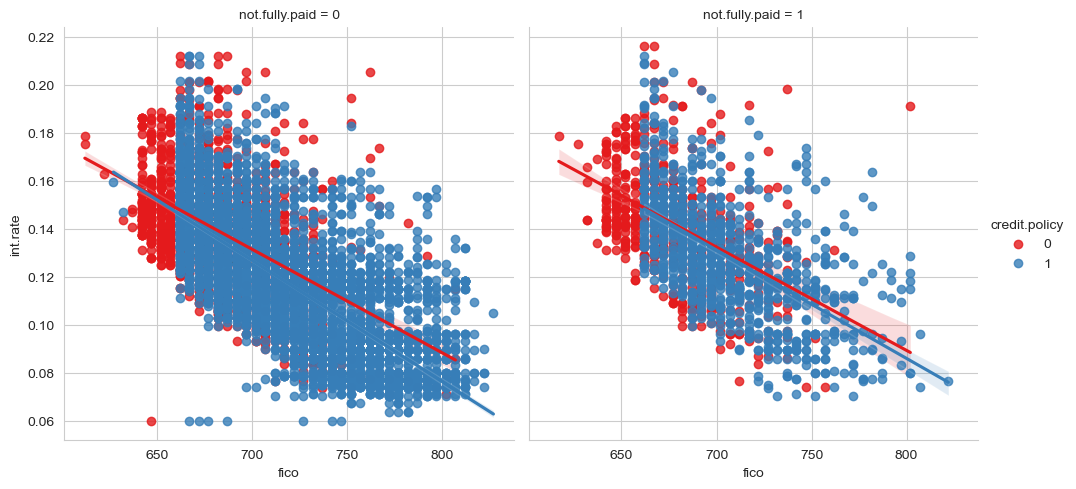

In [81]:
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [82]:
final_df=pd.get_dummies(df,columns=['purpose'],drop_first=True)

In [84]:
X=final_df.drop(['not.fully.paid'],axis=1)
y=final_df['not.fully.paid']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [102]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_1=dtree.predict(X_test)

In [103]:
print(classification_report(y_test,pred_1),'\n',confusion_matrix(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874
 
 [[1994  437]
 [ 346   97]]


In [100]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_2=rfc.predict(X_test)

In [101]:
print(classification_report(y_test,pred_2),'\n',confusion_matrix(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.64      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.74      0.51      0.49      2874
weighted avg       0.82      0.85      0.79      2874
 
 [[2423    8]
 [ 429   14]]
